# Heart Disease Classification (Group 5)


## Introduction

Heart disease is a common health condition that affects many people around the world, with coronary disease being a significant contributor to its prevalence. Coronary artery disease refers to the buildup of plaque in the wall of the arteries that supply blood to the heart, otherwise known as atherosclerosis. Plaque buildup will cause the inside of the arteries to narrow over time, leading to reduced blood flow to the heart muscle. Various diagnostic measures, such as cholesterol levels, blood pressure, and electrocardiogram (ECG) readings, play crucial roles in assessing the presence and severity of this condition. Given the significant impact of coronary disease on public health, predictive analytics can help us gain a better understanding of the relationship between risk factors and disease development, ultimately guiding efforts to prevent and manage heart disease effectively.

Through our predictive analysis, we hope to address the following question


**Question:** How can we use diagnostic measurements such as age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar level, resting electrocardiographic results, … etc, to classify whether a patient has heart disease? (Presence  = 1,2,3,4; Absence =s).

**Our dataset:** The dataset we have selected is a subset ofed heart disease diagnosis database that contains information about 303 unique patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio. Each entry contains 14 attributes for each patient as listed in the following: 

- Age (age)
- Sex (sex)
- Chest pain type (cp)
    - Value 1: Typical angina
    - Value 2: Atypical angina
    - Value 3: Non-anginal pain
    - Value 4: Asymptomatic   
- Resting blood pressure (trestbps)  
    - In mm Hg on admission to the hospital
- Serum cholesterol (chol)
    - In mg/dl      
- Fasting blood sugar > 120 mg/dl  (fbs)       
    - Value 0: false
    - Value 1: true
- Resting electrocardiographic results (restecg)   
    - Value 0: Normal
    - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- Maximum heart rate achieved (thalach)   
- Exercise induced angina (exang) 
    - Value 0: No
    - Value 1: Yes 
- ST depression induced by exercise relative to rest (oldpeak)   
- The slope of the peak exercise ST segment  (slope) 
    - Value 1: Upsloping
    - Value 2: Flat
    - Value 3: Downsloping  
- Number of major vessels (0-3) colored by flourosopy (ca)     
- Exercise Thallium heart scan (thal)
    - Value 3: Normal
    - Value 6: Fixed defect
    - Value 7: Reversable defect     
- Diagnosis of heart disease: Angiographic disease status (num) 
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing



## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Reading the data

In [24]:
heart_disease_data <- read.csv("data/processed_cleveland.csv")
colnames(heart_disease_data) <- c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Serum_Cholestoral", "Fasting_Blood_Sugar", "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "Oldpeak", "Slope", "CA", "Exercise_Thallium_Heart_Scan", "Status")
heart_disease_data

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Slope,CA,Exercise_Thallium_Heart_Scan,Status
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


### Selecting potential predictors among the variables

In [25]:
# This is to separate the data/columns we will use in our model to classify whether the patient has heart disease or not.
heart_data <- select(heart_disease_data, Age, Chest_Pain_Type, Resting_Blood_Pressure, Serum_Cholestoral, Status)
heart_data

Age,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Status
<int>,<int>,<int>,<int>,<int>
63,1,145,233,0
67,4,160,286,2
67,4,120,229,1
⋮,⋮,⋮,⋮,⋮
57,4,130,131,3
57,2,130,236,1
38,3,138,175,0


### Summarizing the data

We are going to use only training data from this point on for our data exploration.

In [26]:
#splitting dataframe into training, testing datasets
heart_split <- initial_split(heart_data, prop = 0.75, strata = Status)

heart_train <- training(heart_split)
heart_test <- testing(heart_split)

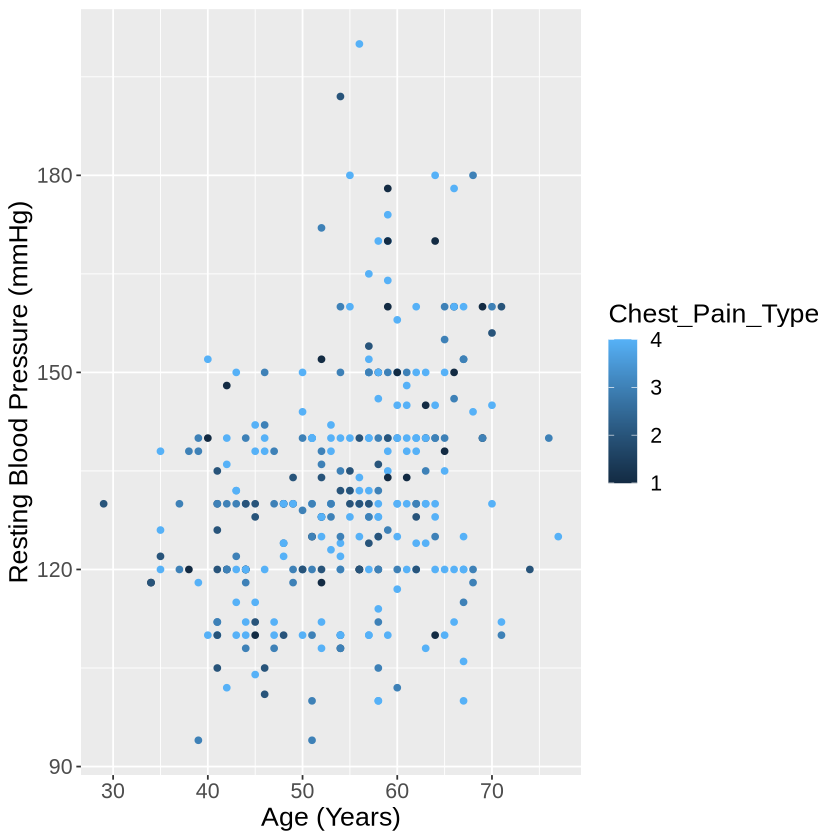

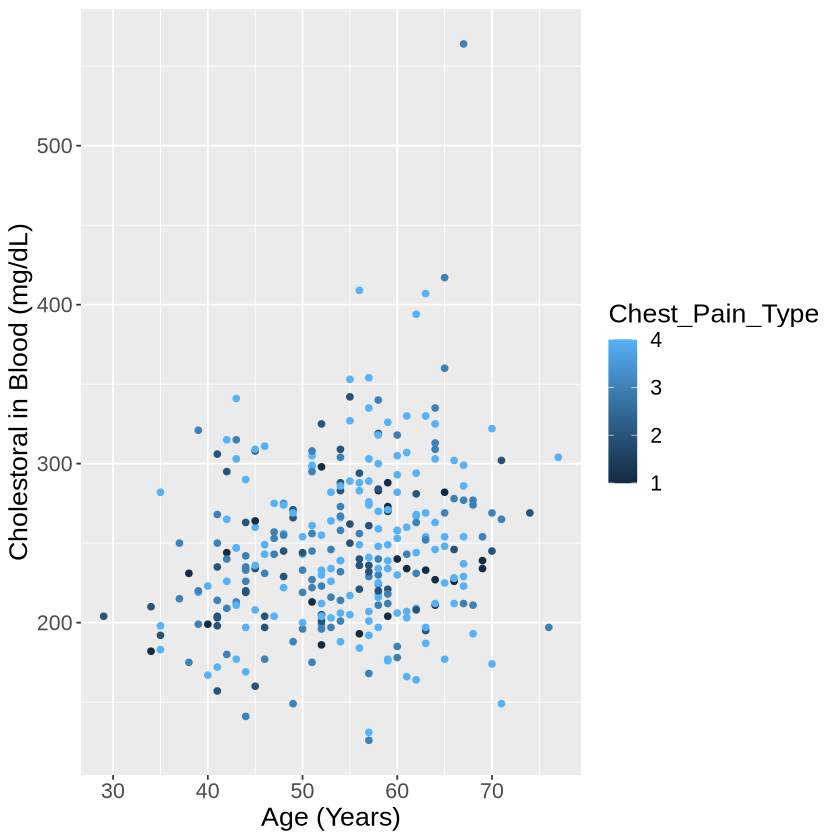

In [12]:
heart_data_plot_1 <- ggplot(used_heart_data, aes(x = Age , y = Resting_Blood_Pressure)) +
geom_point(aes(color = Chest_Pain_Type)) +
labs(x = "Age (Years)", y = "Resting Blood Pressure (mmHg)") +
theme(text = element_text(size = 16))
heart_data_plot_1

heart_data_plot_2 <- ggplot(used_heart_data, aes(x = Age , y = Serum_Cholestoral)) +
geom_point(aes(color = Chest_Pain_Type)) +
labs(x = "Age (Years)", y = "Cholestoral in Blood (mg/dL)") +
theme(text = element_text(size = 16))
heart_data_plot_2

# I don't know how I am going to display both Resting Blood Pressure and the amount of Cholestorol in Blood on the same graph so I attempted to do them separately.
# Maybe we pick either Cholestoral or Resting Blood Pressure? Just an idea.
# feel free to play around with it if you must. I researched the units, so I am unsure about those.

## Methods

In [ ]:
#Explain how you will conduct either your data analysis and which variables/columns you will use.
#Describe at least one way that you will visualize the results.

Because the dataset we loaded has already determined whether the patient has heart disease (listed in column "Status"), 
we will use the technique of regression to make a model and test its accuracy of determining heart disease by comparing it to the non-filtered graph (at the beginning).
The variables we have chosen to use in our model to determine the presence of heart disease are Age, Chest Pain Type, Resting Blood Pressure, and Serum Cholestoral.

To visualize the results we will...

# If you guys have any ideas for this I am all ears.

## Expected outcomes and significance: